# Project: No Show Appointments

## Table of Contents
Introduction

Data Wrangling

Exploratory Data Analysis

Conclusions

## Introduction

### Dataset Description 

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. It contains 14 features
1.   **Patientid:** patient identification
2.   **AppointmentID:** appointment identification
3.   **Gender** 
4.   **ScheduledDay:** the day the patient registerd for an appointment
5.   **AppointmentDay:** the actual appointment day
6.   **Age**
7.   **Neighbourhood:** indicates the location of the hospital
8.   **Scholarship:**  indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família. 1: erolled, 0: not enrolled.
9.   **Diabetes:** 1: diabetic, 0: not diabetic.
10.  **Hipertension:** 1: True, 0: False
11.  **Alcoholism:** 1: alcoholic, 0: not alcoholic
12.  **Handcap:** number of disabilities a patient has, 0, 2, 3 or 4.
13.  **SMS_received:** whether or not the patient received an sms, 1: received, 0: didn't receive
14.  **No-show:** whether or not the patient showed up for the appointment, Yes: didn't show up, No: showed up


### Question(s) for Analysis
>****
1.   Does showing up or not depend on gender?
2.   Are the features corrolated?
3.   What is the age distribution of the patients?
4.   Does showing up depend on the age?
5.   How does age affect showing up or not for each gender?
6.   On which day of the week do patients show up the most? and on which do they show up the least?
7.   Does showing up depend on the period between the appointment day and the scheduled day?
8.   In which neighbourhood do patients show up the most? and in which do they show up the least?
9.  Does showing up depend on Scholarship, Hipertension, diabetes, alcoholism?
10.  Do handicap patients show up more often?
11.  Does receiving an SMS affect showing up?



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)



## Data Wrangling



### General Properties


In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.shape

(110527, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

There are no misssing values

In [7]:
df.duplicated().sum()

0

No duplicated rows too

In [8]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

Some dtypes need to be changed, like Patientid, Scheduledday and Appointmentday

In [9]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

There are five unique values for Handcap, which indicate the number of disabilities the patient has


### Data Cleaning

 

From the assesment of the data, some features dtypes need to changed, some features are not important and I will introduce a few more features 

In [10]:
# Make a copy pf the dataset to clean it
df_c = df.copy()
# Modify the column names to be in lowercase letters and with underscore betweenwords
df_c.rename(columns = lambda x: x.strip().lower().replace('-', '_'), inplace=True)
df_c.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
df_c.patientid = df_c.patientid.astype(str).apply(lambda x: x[:-2])

The patientid dtype is float, I changed it to be string and drop the .0 in the end

In [12]:
df_c.drop('appointmentid', axis=1, inplace=True)

I dropped the appointmentid column because it is to specifc to the appointment

In [13]:
# Explore the data so far
df_c.head()

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,29872499824296,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [14]:
df_c.scheduledday = pd.to_datetime(df_c.scheduledday)
df_c.appointmentday = pd.to_datetime(df_c.appointmentday)

I Changed the scheduledday and the appointment day dtypes to datetime format

In [15]:
df_c.dtypes

patientid                      object
gender                         object
scheduledday      datetime64[ns, UTC]
appointmentday    datetime64[ns, UTC]
age                             int64
neighbourhood                  object
scholarship                     int64
hipertension                    int64
diabetes                        int64
alcoholism                      int64
handcap                         int64
sms_received                    int64
no_show                        object
dtype: object

In [16]:
# Split the scheduledday column to two features, date and time
df_c.insert(3, 'schedulled_time', [d.time() for d in df_c.scheduledday])
df_c.scheduledday = [d.date() for d in df_c.scheduledday]

# Convert the schedledday into datetime format
df_c.scheduledday = pd.to_datetime(df_c.scheduledday)

The scheduledday column contains the date and the time of registering, I split it into two columns: scheduleday contains the schedled day date, scheduled_time contains the scheduled time

In [17]:
# Take only the date of the appointment day
df_c.appointmentday = [d.date() for d in df_c.appointmentday]
# convert appointment day into datetime format
df_c.appointmentday = pd.to_datetime(df_c.appointmentday)

I took only the dae of the appointment day

In [18]:
df_c.dtypes

patientid                  object
gender                     object
scheduledday       datetime64[ns]
schedulled_time            object
appointmentday     datetime64[ns]
age                         int64
neighbourhood              object
scholarship                 int64
hipertension                int64
diabetes                    int64
alcoholism                  int64
handcap                     int64
sms_received                int64
no_show                    object
dtype: object

In [19]:
df_c.head(3)

,patientid,gender,scheduledday,schedulled_time,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,29872499824296,F,2016-04-29,18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,M,2016-04-29,16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,F,2016-04-29,16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [20]:
df_c.insert(5, 'appoint_day_name', df_c.appointmentday.dt.day_name())

I added another column of the name of the day of the appointment day

In [21]:
# Check if all the appointment days and the scheduled days are consistent, i.e. the scheduled day is before the appointment day
df_c[df_c.appointmentday < df_c.scheduledday]

,patientid,gender,scheduledday,schedulled_time,appointmentday,appoint_day_name,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
27033,7839272661752,M,2016-05-10,10:51:53,2016-05-09,Monday,38,RESISTÊNCIA,0,0,0,0,1,0,Yes
55226,7896293967868,F,2016-05-18,14:50:41,2016-05-17,Tuesday,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes
64175,24252258389979,F,2016-05-05,13:43:58,2016-05-04,Wednesday,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes
71533,998231581612122,F,2016-05-11,13:49:20,2016-05-05,Thursday,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
72362,3787481966821,M,2016-05-04,06:50:57,2016-05-03,Tuesday,7,TABUAZEIRO,0,0,0,0,0,0,Yes


Apparantly some appointment days are before the scheduled day, which does not make sense according the the data description

In [22]:
df_c = df_c[df_c.appointmentday >= df_c.scheduledday]

I chose the rows for which the appointment day is the same as or after the scheduled day

In [23]:
# Insert a column of the period in days between the scheduled day and the appointment day
df_c.insert(6, 'waiting_period', df_c.appointmentday - df_c.scheduledday)
# change the waiting pariod format to be integer
df_c.waiting_period = df_c.waiting_period.apply(lambda x: int(str(x)[0]))

I added another feature, waiting_period, which is the difference between the appoitnment day and the scheduled day in days

In [24]:
# Change no_show to show
df_c.rename(columns={'no_show': 'show'}, inplace=True)
# Change Yes to 0 and No to 1
df_c.show.replace(to_replace={'Yes': 0, 'No': 1}, inplace=True)

The no_show column is confusing, so I changed its name to show and 1 meanns the patient showed up, 0 means the patient did not show up

In [25]:
df_c.head(3)

,patientid,gender,scheduledday,schedulled_time,appointmentday,appoint_day_name,waiting_period,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
0,29872499824296,F,2016-04-29,18:38:08,2016-04-29,Friday,0,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,558997776694438,M,2016-04-29,16:08:27,2016-04-29,Friday,0,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4262962299951,F,2016-04-29,16:19:04,2016-04-29,Friday,0,62,MATA DA PRAIA,0,0,0,0,0,0,1


In [26]:
df_c.dtypes

patientid                   object
gender                      object
scheduledday        datetime64[ns]
schedulled_time             object
appointmentday      datetime64[ns]
appoint_day_name            object
waiting_period               int64
age                          int64
neighbourhood               object
scholarship                  int64
hipertension                 int64
diabetes                     int64
alcoholism                   int64
handcap                      int64
sms_received                 int64
show                         int64
dtype: object

#### I will investigate the rows of the same patient id and the same appointment day to check for inconsistencies

Return all the rows of duplicated patient id and appointment date

In [27]:
df_duplicated = df_c[df_c.duplicated(['patientid', 'appointmentday'], keep=False)]
df_duplicated.shape

(16198, 16)

In [28]:
df_duplicated.patientid.value_counts()

822145925426128    86
99637671331        82
26886125921145     67
33534783483176     61
6264198675331      58
                   ..
843754424893875     2
47654341827791      2
662531583467394     2
635918731298        2
9181771875394       2
Name: patientid, Length: 5947, dtype: int64

In [29]:
df_duplicated[df_duplicated.patientid == '822145925426128'][df_duplicated.show == 0]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,patientid,gender,scheduledday,schedulled_time,appointmentday,appoint_day_name,waiting_period,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
9290,822145925426128,M,2016-05-06,19:56:38,2016-05-10,Tuesday,4,38,REDENÇÃO,0,0,0,0,0,1,0


I will check the appointment date 2016-05-10 for the patient 822145925426128

In [30]:
df_duplicated[df_duplicated.patientid == '822145925426128'][df_duplicated.appointmentday == '2016-05-10']

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,patientid,gender,scheduledday,schedulled_time,appointmentday,appoint_day_name,waiting_period,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
8644,822145925426128,M,2016-05-10,16:01:45,2016-05-10,Tuesday,0,38,REDENÇÃO,0,0,0,0,0,0,1
8761,822145925426128,M,2016-05-10,12:14:38,2016-05-10,Tuesday,0,38,REDENÇÃO,0,0,0,0,0,0,1
9290,822145925426128,M,2016-05-06,19:56:38,2016-05-10,Tuesday,4,38,REDENÇÃO,0,0,0,0,0,1,0


It appears that he showed up two times and did not show up one time for the same date!

In [31]:
# A dictionary of the dataframes with the same patient id and appointment day
duplicated_df_dict = {k: d for k, d in df_duplicated.groupby(['patientid', 'appointmentday'])}

# The kets to that dictionary
ks = list(duplicated_df_dict.keys())

I made a dictionary contining all the dataframes in with the same patient id and appointment day

In [32]:
# A helper function
def investigate(df):
  '''
  Takes in a data frame and checks whether all the values of the show column aren't the same or not
  if they aren't the same return True, if they are return False
  '''
  col = df.show
  vals = col.to_numpy()
  if not (vals[0] == vals).all():
    return True
  else:
    return False

The investigate function takes a dataframe coontaining the same patient id and appointment day and returns True if the dataframe is inconsitent, i.e. the patient showed up and did not show up on the same day.

In [33]:
L = len(ks) # the number of dataframes in the duplicated_df_dict
id_date = [] 

for l in range(L):
  df_investigate = duplicated_df_dict[ks[l]]
  if investigate(df_investigate):
    id_date.append((list(df_investigate.patientid)[0], str(list(df_investigate.appointmentday)[0])[:10]))
print('Some of the (Patientid, date) for which the show values are not consistent are: ')
print(id_date[:5])
print('#'*50)
print('The number of dataframes that are inconsistent is {}'.format(len(id_date)))

Some of the (Patientid, date) for which the show values are not consistent are: 
[('1119792781112', '2016-05-10'), ('112686694877156', '2016-05-18'), ('113284814465264', '2016-06-03'), ('113349441268785', '2016-05-31'), ('113891922247784', '2016-05-24')]
##################################################
The number of dataframes that are inconsistent is 1341


It appears that 1341 data frames for the same patient id and appointment day are inconsistent

In [34]:
# Drop the inconsistent data frames
df_clean = df_c.copy()
for l in range(L):
  df_investigate = duplicated_df_dict[ks[l]]
  if investigate(df_investigate):
    df_clean.drop(df_investigate.index, inplace=True)

I dropped the inconsistent rows
The previous cell takes relatively long time to execute

#### Check if all the ages are sensible

In [35]:
df_clean.age.describe()

count    107559.000000
mean         37.104640
std          23.119229
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

The minimum age is -1, smaller than 0 !

In [36]:
df_clean[df_clean.age < 0]

,patientid,gender,scheduledday,schedulled_time,appointmentday,appoint_day_name,waiting_period,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
99832,465943158731293,F,2016-06-06,08:58:13,2016-06-06,Monday,0,-1,ROMÃO,0,0,0,0,0,0,1


Only one patient, I will drop it

In [37]:
df_clean = df_clean[df_clean.age >= 0]

In [38]:
df_clean.head()

,patientid,gender,scheduledday,schedulled_time,appointmentday,appoint_day_name,waiting_period,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
0,29872499824296,F,2016-04-29,18:38:08,2016-04-29,Friday,0,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,558997776694438,M,2016-04-29,16:08:27,2016-04-29,Friday,0,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4262962299951,F,2016-04-29,16:19:04,2016-04-29,Friday,0,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,867951213174,F,2016-04-29,17:29:31,2016-04-29,Friday,0,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8841186448183,F,2016-04-29,16:07:23,2016-04-29,Friday,0,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [39]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107558 entries, 0 to 110526
Data columns (total 16 columns):
patientid           107558 non-null object
gender              107558 non-null object
scheduledday        107558 non-null datetime64[ns]
schedulled_time     107558 non-null object
appointmentday      107558 non-null datetime64[ns]
appoint_day_name    107558 non-null object
waiting_period      107558 non-null int64
age                 107558 non-null int64
neighbourhood       107558 non-null object
scholarship         107558 non-null int64
hipertension        107558 non-null int64
diabetes            107558 non-null int64
alcoholism          107558 non-null int64
handcap             107558 non-null int64
sms_received        107558 non-null int64
show                107558 non-null int64
dtypes: datetime64[ns](2), int64(9), object(5)
memory usage: 14.0+ MB



## Exploratory Data Analysis


### Research Question 1 Does showing up or not depend on gender?

In [40]:
df_clean.describe()

,waiting_period,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
count,107558.000000,107558.000000,107558.000000,107558.000000,107558.000000,107558.000000,107558.000000,107558.000000,107558.000000
mean,2.155107,37.104995,0.098217,0.197094,0.071803,0.030077,0.022053,0.324467,0.805705
std,2.418083,23.119045,0.297609,0.397806,0.258163,0.170799,0.160876,0.468177,0.395659
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,9.000000,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


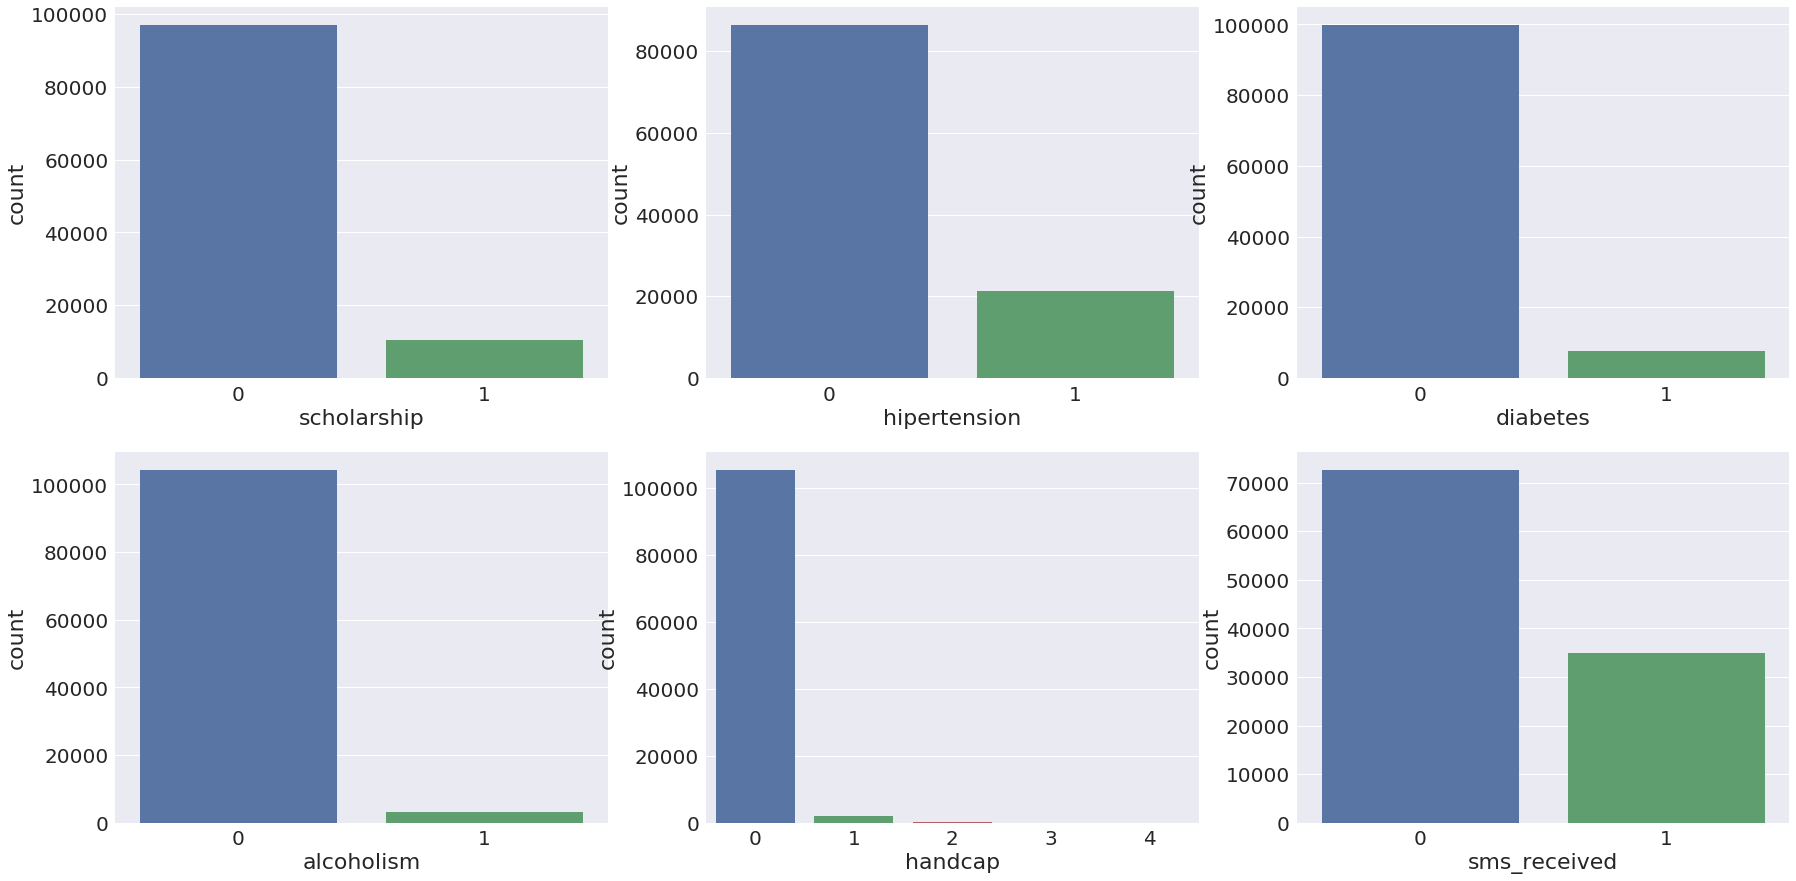

In [41]:
feats = ['scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received']
plt.figure(figsize=(30,15))
sns.set(font_scale=2)
for i, feat in enumerate(feats):
    plt.subplot(2, 3, i+1)
    sns.countplot(data=df_clean, x=feat)

Distribution of the observations over the features ['scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received']

#### Gender Distribution

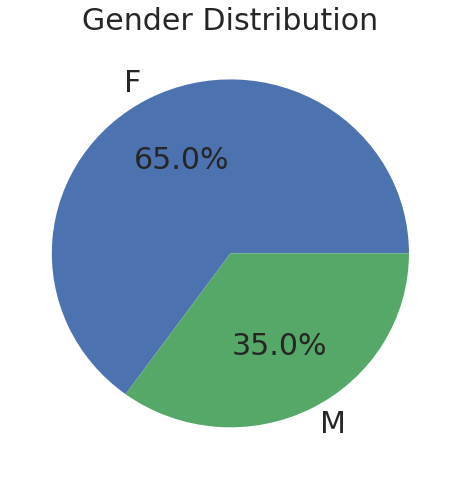

In [42]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
plt.title('Gender Distribution', fontsize=30)

df_clean.gender.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8) ,fontsize=30)
plt.ylabel('')
plt.show()

65% of the patients are Females

#### Gender effect on showing up

In [43]:
males_show= df_clean[df_clean.gender == 'M'].show.value_counts()
females_show = df_clean[df_clean.gender == 'F'].show.value_counts()

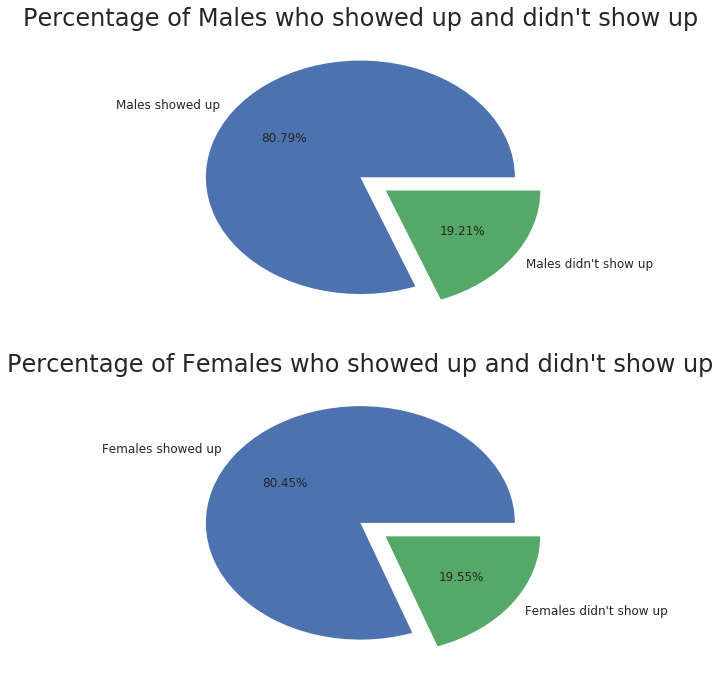

In [44]:
plt.figure(figsize=(9, 10))
plt.subplot(2, 1, 1)
plt.pie(males_show, labels=['Males showed up', 'Males didn\'t show up'], autopct='%1.2f%%', textprops={'fontsize': 12}, explode=[0, .2])
plt.title('Percentage of Males who showed up and didn\'t show up')
plt.subplot(2, 1, 2)
plt.pie(females_show, labels=['Females showed up', 'Females didn\'t show up'], autopct='%1.2f%%', textprops={'fontsize': 12}, explode=[0, .2])
plt.title('Percentage of Females who showed up and didn\'t show up')
plt.tight_layout(1.2)
plt.show()

Gender does not affect showing up
Males and females are equally likely to show up

### Research Question 2  Are the features corrolated?

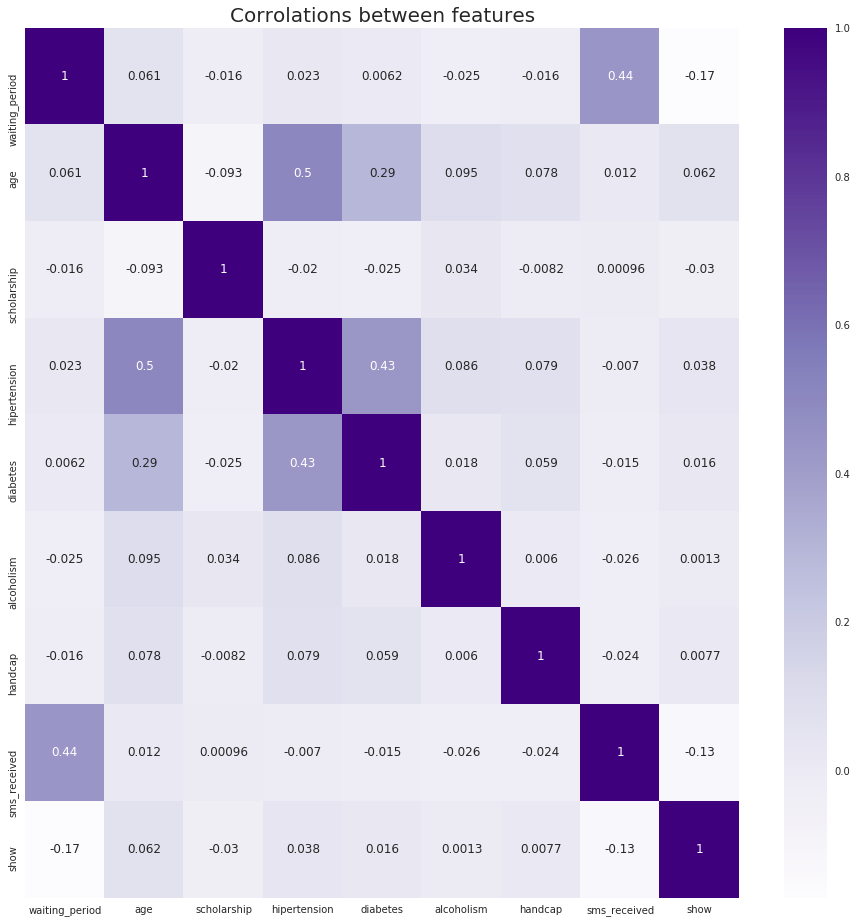

In [45]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
sns.set(font_scale=1)
corr_matrix = df_clean.corr()
plt.figure(figsize=(16, 16))
plt.title('Corrolations between features', fontsize=20)
sns.heatmap(corr_matrix, annot=True, cmap='Purples')
plt.show()

There is a:
*   positive corrolation between age and hipertension
*   positive corrolation between waiting period and sms received
*   negative corrolation between sms received nad showing up
*   negative corrolation between scholarship and showing up
*   negative corrolation between waiting period and showing up

### Research Question 3 What is the age distribution of the patients?

In [46]:
df_clean.age.describe()

count    107558.000000
mean         37.104995
std          23.119045
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

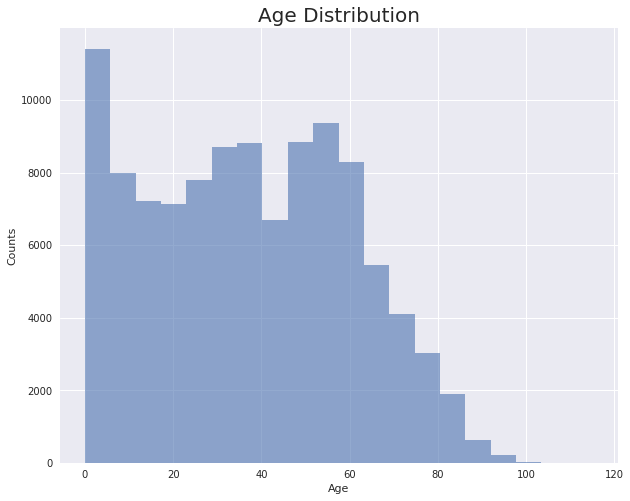

In [47]:
df_clean.age.hist(figsize=(10, 8), bins=20, alpha=.6);
plt.xlabel('Age')
plt.ylabel('Counts')
plt.title('Age Distribution', fontsize=20)
plt.show()

Looks like the distribution is skewed to the right there are 2 peaks in the patients age distribution. At 0, and 50 years old

In [48]:
df_clean.age.mode()

0    0
dtype: int64

The mode is zero

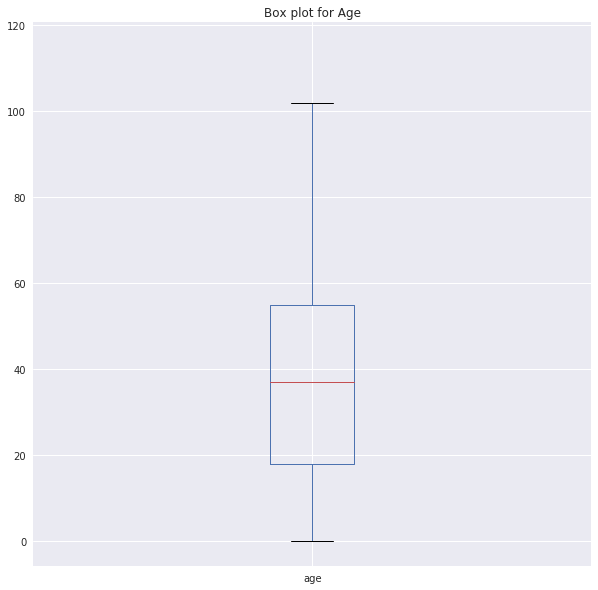

In [49]:
df_clean.age.plot(kind='box', figsize=(10, 10))
plt.title('Box plot for Age')
plt.show()

The outlier of the age is greater than 100

In [50]:
df_clean[df_clean.age > 100].patientid.nunique()

4

There are 4 patiens older than 100

In [51]:
df_clean[df_clean.age > 100].gender

58014    F
63912    F
63915    F
68127    F
76284    F
90372    F
97666    F
Name: gender, dtype: object

It appears that they are all females

### Research Question 4 Does showing up depend on the age?

In [52]:
df_clean.age.describe()

count    107558.000000
mean         37.104995
std          23.119045
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [53]:
# make a list of the life stage of the patient depending on their age
life_stage = []
for i in df_clean.age:
    if i < 12:
        life_stage.append('Child')
    if i <= 18 and i >= 12:
        life_stage.append('Teenager')
    elif i >= 19 and i < 38:
        life_stage.append('Early Adult')
    elif i >= 38 and i < 56:
        life_stage.append('Middle Adult')
    elif i >= 56:
        life_stage.append('Late Adult')

I will classify the patient's lif stage depending on their age into five intervals, [0, 11], [12, 18], [19, 37], [38, 56] and [56, infinity]

In [54]:
df_clean.insert(8, 'life_stage', life_stage)
df_clean.head()

,patientid,gender,scheduledday,schedulled_time,appointmentday,appoint_day_name,waiting_period,age,life_stage,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
0,29872499824296,F,2016-04-29,18:38:08,2016-04-29,Friday,0,62,Late Adult,JARDIM DA PENHA,0,1,0,0,0,0,1
1,558997776694438,M,2016-04-29,16:08:27,2016-04-29,Friday,0,56,Late Adult,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4262962299951,F,2016-04-29,16:19:04,2016-04-29,Friday,0,62,Late Adult,MATA DA PRAIA,0,0,0,0,0,0,1
3,867951213174,F,2016-04-29,17:29:31,2016-04-29,Friday,0,8,Child,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8841186448183,F,2016-04-29,16:07:23,2016-04-29,Friday,0,56,Late Adult,JARDIM DA PENHA,0,1,1,0,0,0,1


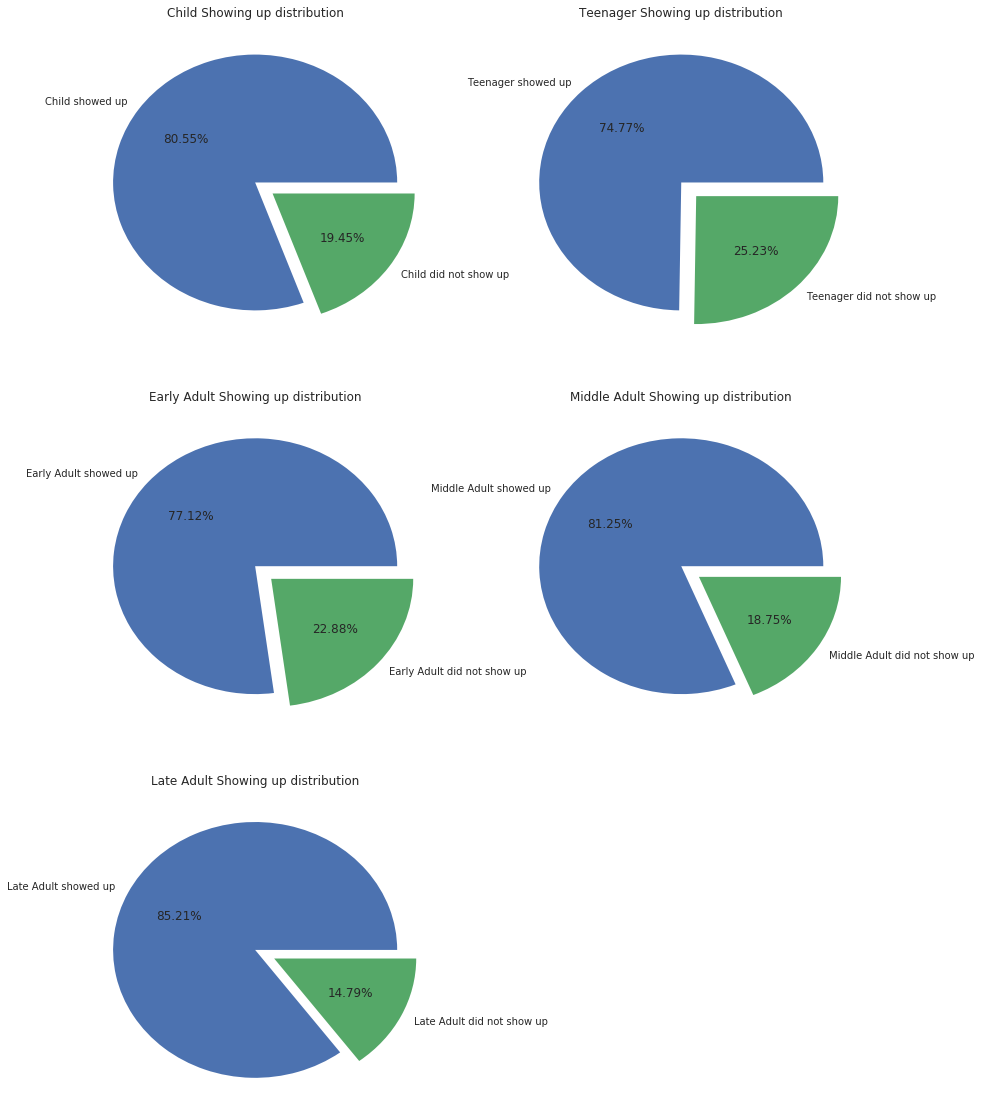

In [55]:
life_stages = ['Child', 'Teenager', 'Early Adult', 'Middle Adult', 'Late Adult']
plt.figure(figsize=(14, 20))

for i, stage in enumerate(life_stages):
    plt.subplot(3, 2, i+1)
    data = df_clean[df_clean.life_stage == stage].show.value_counts()
    label_names = [stage + ' showed up', stage + ' did not show up']
    plt.pie(data, labels=label_names, autopct='%1.2f%%', explode=[0, .15])
    plt.title(stage + ' Showing up distribution')
    

### Research Question 5 How does age affect showing up or not for each gender?

It looks like teenagers are most likely not to show up for the appointment then early adults, children, middle adults and late adults are most likely to show up

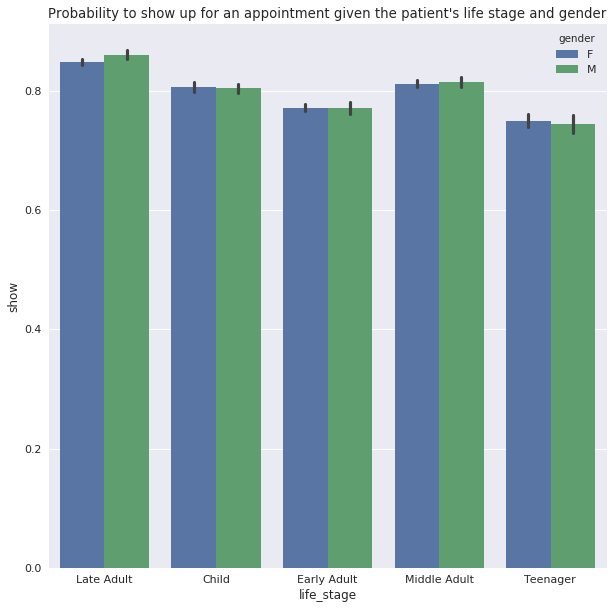

In [56]:
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.1)
sns.barplot(data=df_clean, x=df_clean.life_stage, y=df_clean.show, hue='gender')
plt.title('Probability to show up for an appointment given the patient\'s life stage and gender')
plt.show()

Looks like Male Late adults are more likely to show up for the appointment than female late adults. While female teenagers are more likely to show up for the appointment than male teenagers. The probability to show up for other life stages does not depend so much on gender

### Research Question 6 On which day of the week do patients show up the most? and on which do they show up the least?

In [57]:
df_clean.groupby('appoint_day_name').show.count()

appoint_day_name
Friday       18505
Monday       22100
Saturday        37
Thursday     16772
Tuesday      24922
Wednesday    25222
Name: show, dtype: int64

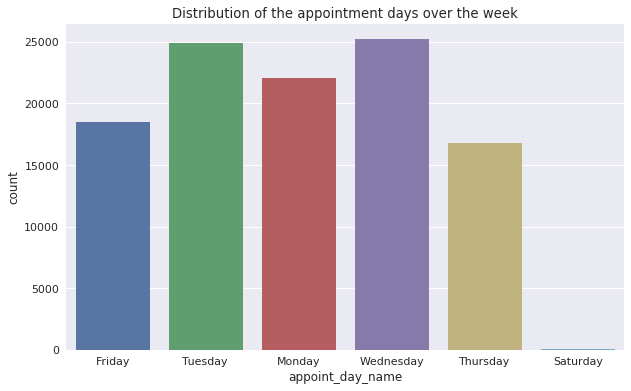

In [58]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean, x='appoint_day_name')
plt.title('Distribution of the appointment days over the week')
plt.show()

Wednesday and Tuesday are the days with the most number of appointments, while Saturday is the least, and no appointments at all on Dunday

In [59]:
df_clean.groupby('appoint_day_name').show.mean()

appoint_day_name
Friday       0.795136
Monday       0.800814
Saturday     0.783784
Thursday     0.814512
Tuesday      0.807439
Wednesday    0.810205
Name: show, dtype: float64

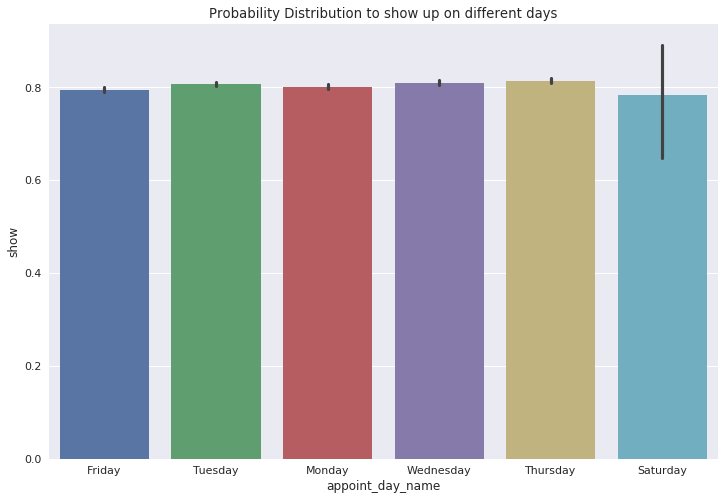

In [60]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df_clean, x=df_clean.appoint_day_name, y=df_clean.show)
plt.title('Probability Distribution to show up on different days')
plt.show()

Thursday is the day on which people show up the most, while Saturday is the day on which people show up the least

In [61]:
df_clean.groupby(['appoint_day_name', 'gender']).show.mean()

appoint_day_name  gender
Friday            F         0.794218
                  M         0.796818
Monday            F         0.796340
                  M         0.808959
Saturday          F         0.777778
                  M         0.800000
Thursday          F         0.815089
                  M         0.813472
Tuesday           F         0.804831
                  M         0.812493
Wednesday         F         0.811835
                  M         0.807153
Name: show, dtype: float64

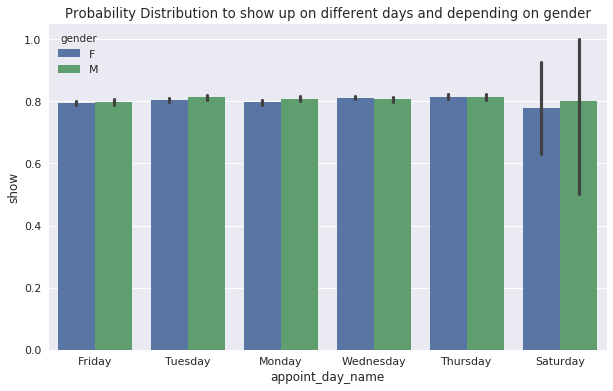

In [62]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_clean, x=df_clean.appoint_day_name, y=df_clean.show, hue='gender')
plt.title('Probability Distribution to show up on different days and depending on gender')
plt.show()

On Wednesday and Thursday Females show up more often than males, while on the other days males show up more often

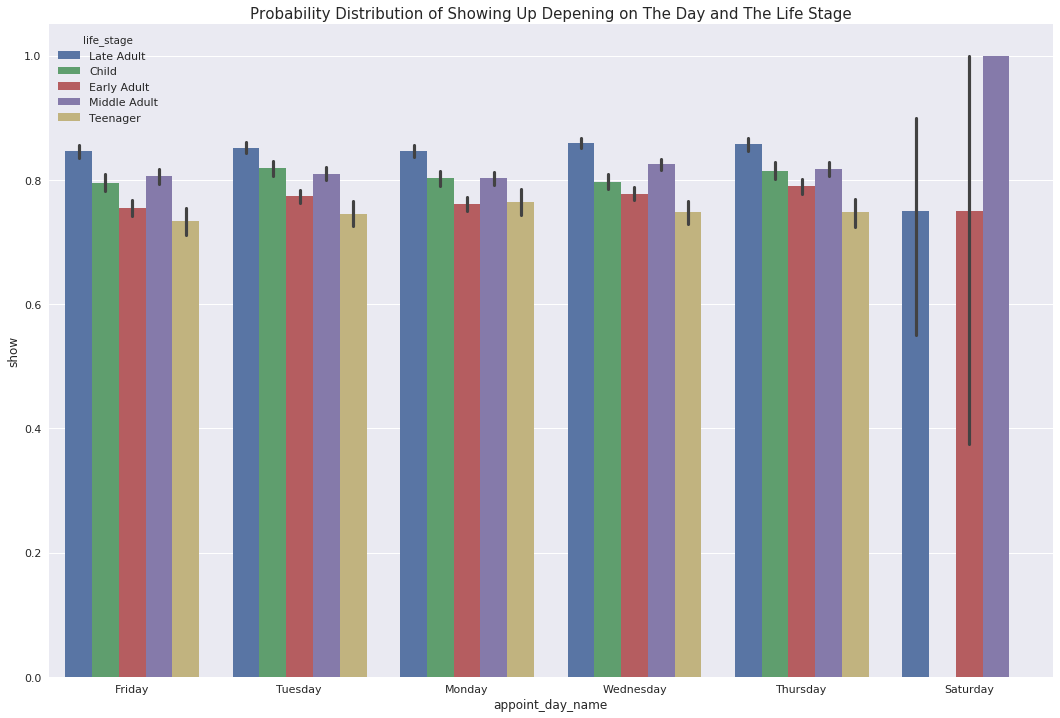

In [63]:
plt.figure(figsize=(18, 12))
sns.barplot(data=df_clean, x=df_clean.appoint_day_name, y=df_clean.show, hue='life_stage')
plt.title('Probability Distribution of Showing Up Depening on The Day and The Life Stage', fontsize=15)
plt.show()

Middle adults show up most often on Saturday while on the other days the descending order of the probability for the patient to show up is Late Adults,  Middle Adults, Child, Early Adult then lastly Teenagers

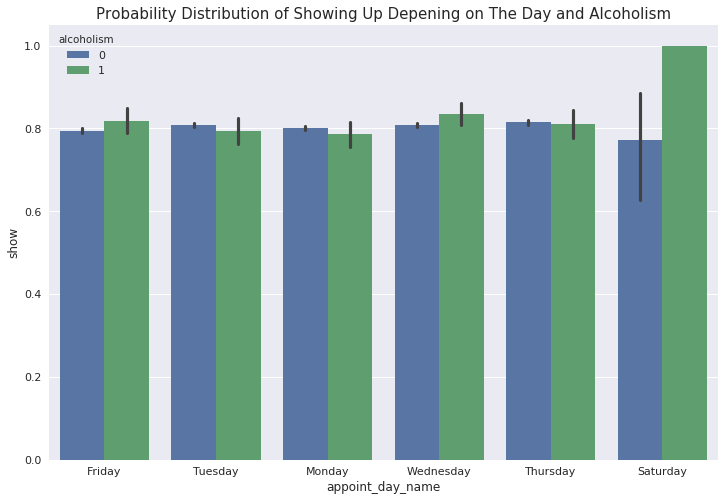

In [64]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df_clean, x=df_clean.appoint_day_name, y=df_clean.show, hue='alcoholism')
plt.title('Probability Distribution of Showing Up Depening on The Day and Alcoholism', fontsize=15)
plt.show()

Alcoholics show up more often on Friday, Wednesday and Saturday

### Research Question 7 Does showing up depend on the period between the appointment day and the scheduled day?

#### Waiting period distribution

In [65]:
df_clean.waiting_period.describe()

count    107558.000000
mean          2.155107
std           2.418083
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max           9.000000
Name: waiting_period, dtype: float64

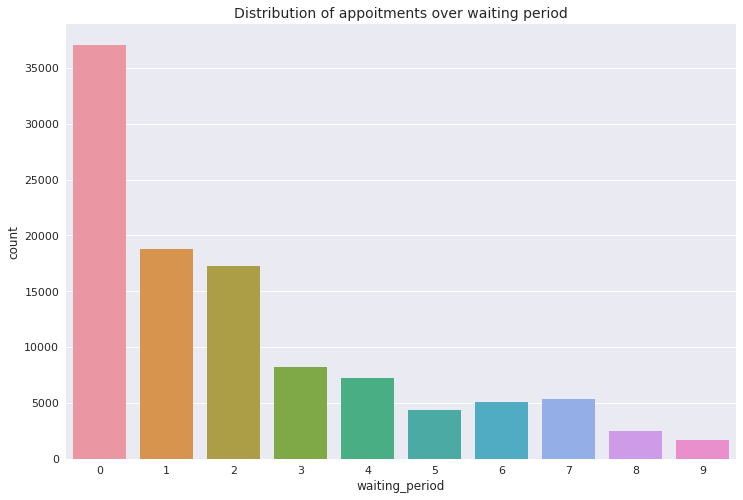

In [66]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df_clean, x='waiting_period')
plt.title('Distribution of appoitments over waiting period', fontsize=14)
sns.countplot(data=df_clean, x='waiting_period')
plt.show()

Most appointments are set on the same day, a fair amount is set two days ahead and very few are set 9 days ahead

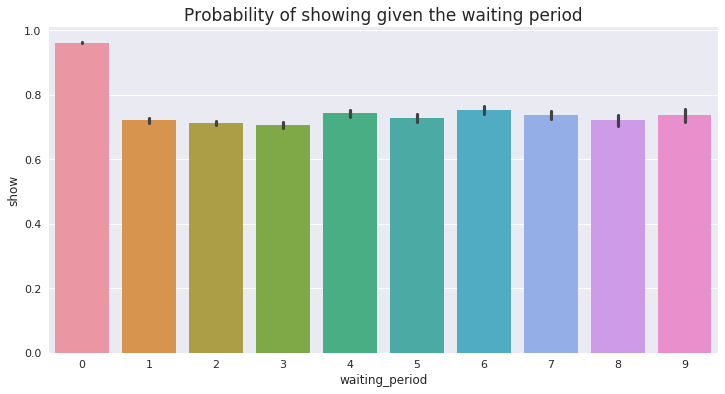

In [67]:
plt.figure(figsize=(12, 6))
sns.barplot(x='waiting_period', y='show', data=df_clean)
plt.title('Probability of showing given the waiting period', fontsize=17)
plt.show()

Most of the patients who scheduled an appointment on the same day showed up.
The patients who scheduled an appointmetn 3 days ahead were the most likely not to show up

### Research Question 8 In which neighbourhood do patients show up the most? and in which do they show up the least?

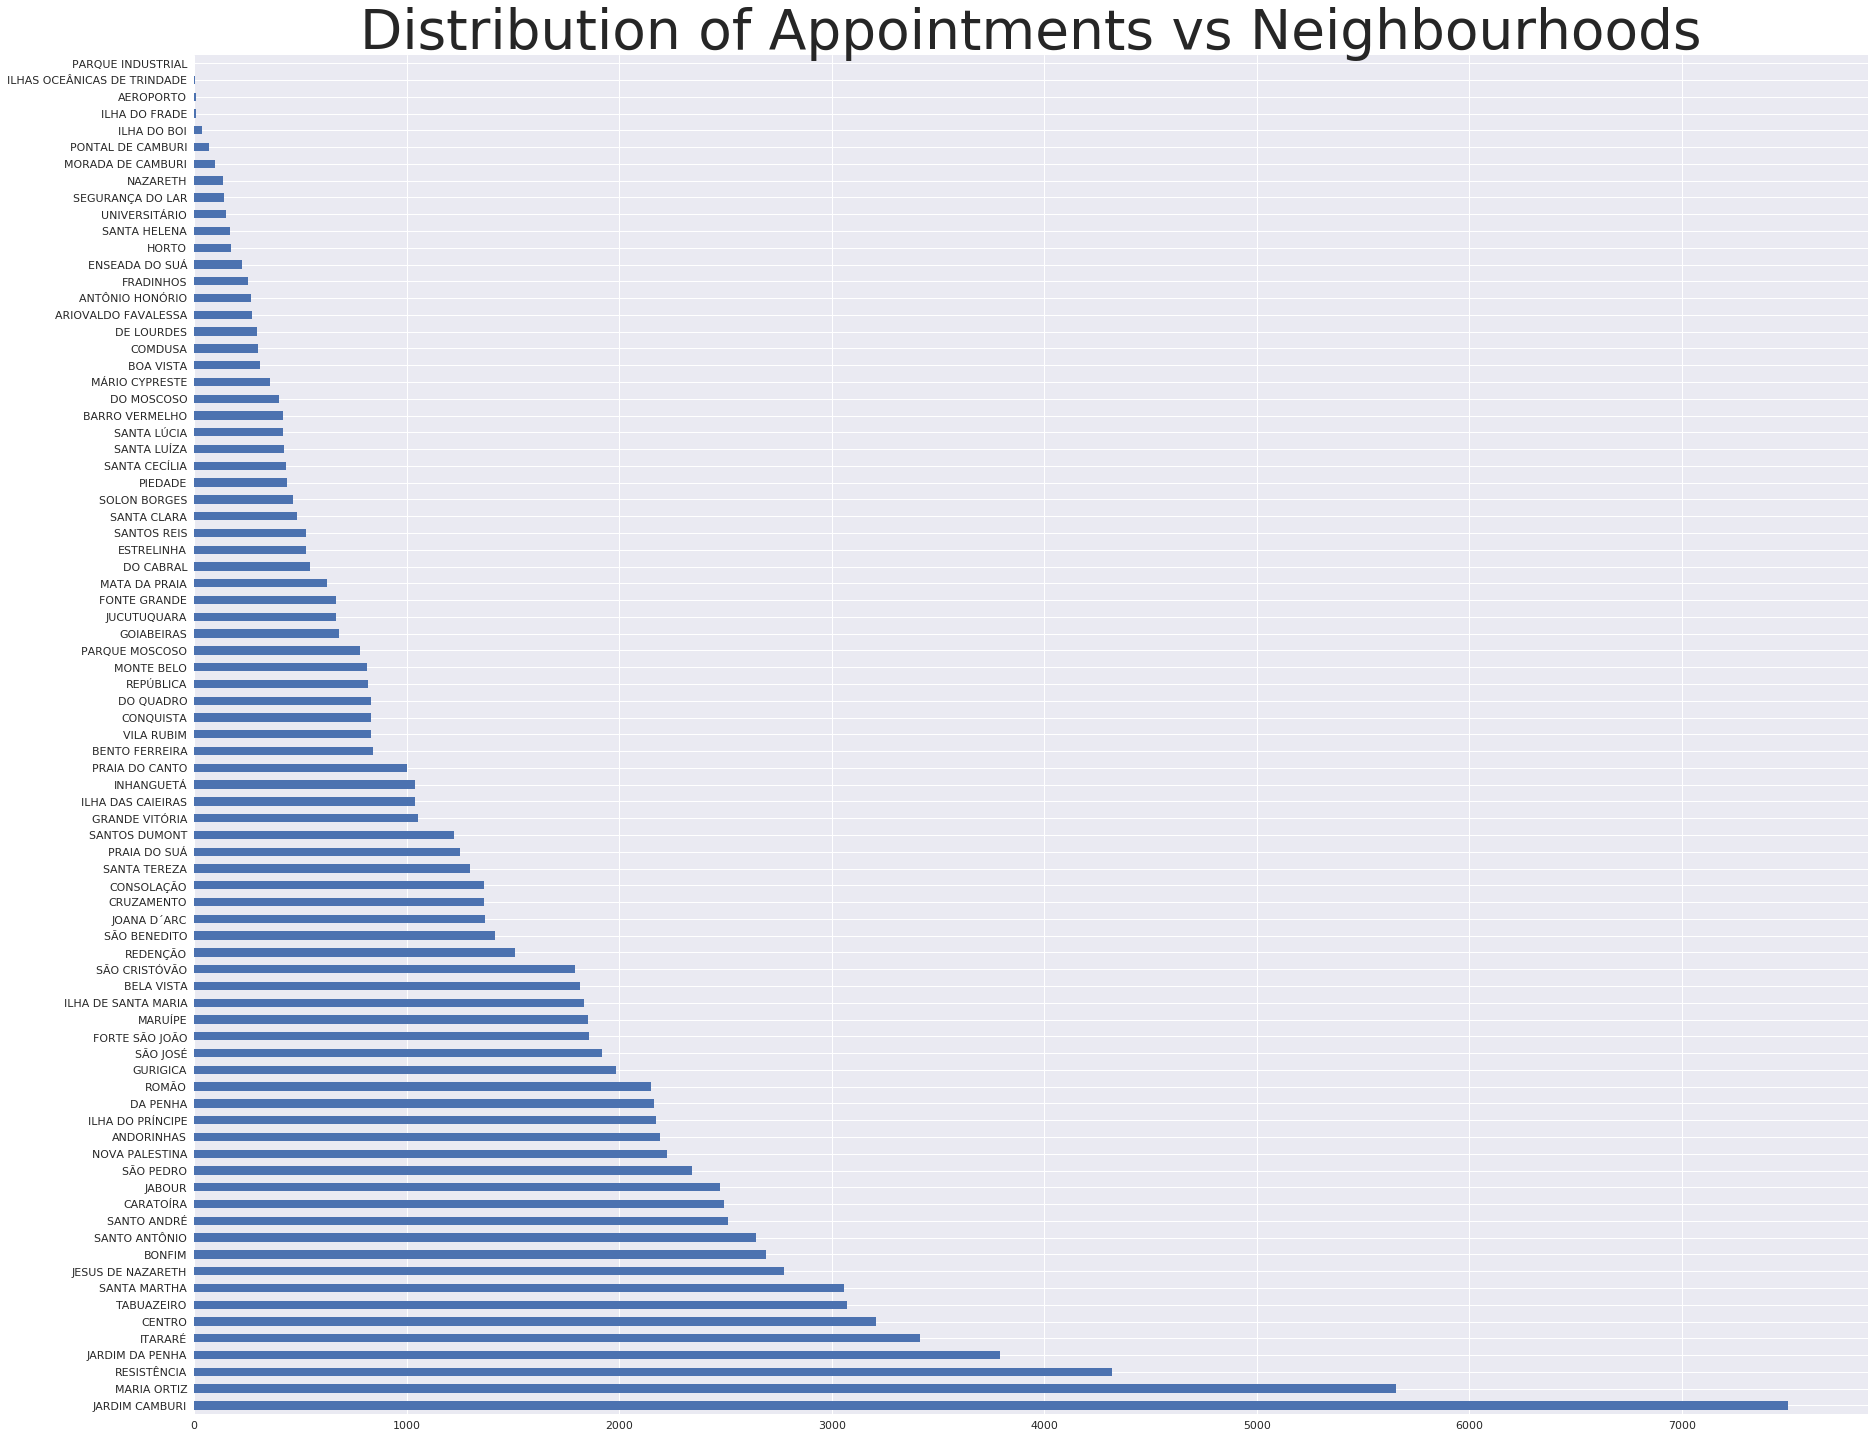

In [68]:
plt.figure(figsize=(30, 25))
df_clean.neighbourhood.value_counts().plot(kind='barh')
plt.title('Distribution of Appointments vs Neighbourhoods', fontsize=55)
plt.show()

The neighbourhoods of the maximum and minimum number of scheduled appoitments are JARDIM CAMBUI abd PARQUE INDUSTRIAL respectively

So many Neighbourhoods to analyze

#### Analyze the probability to show up given the location of the hospital

In [69]:
# Get the probability to show up for an appointment given the hospital neighbourhood
Probability_dist = df_clean.copy().groupby('neighbourhood').show.mean().to_numpy().flatten()
neighbourhoods = df_clean.copy().groupby('neighbourhood').show.mean().index.to_numpy()

neighbourhoods_probs = {'neighbourhood': neighbourhoods, 'probability_show': Probability_dist.flatten()}
neighbourhoods_probs = pd.DataFrame(neighbourhoods_probs)
neighbourhoods_probs.head()

,neighbourhood,probability_show
0,AEROPORTO,0.875000
1,ANDORINHAS,0.778386
2,ANTÔNIO HONÓRIO,0.820225
3,ARIOVALDO FAVALESSA,0.789668
4,BARRO VERMELHO,0.788969


In [70]:
neighbourhoods_probs.probability_show.describe()

count    81.000000
mean      0.801594
std       0.097590
min       0.000000
25%       0.789668
50%       0.809816
75%       0.826087
max       1.000000
Name: probability_show, dtype: float64

The maxilum probability to show is 100% and the minimum is 0.
I will check these extremes

In [71]:
extremes = neighbourhoods_probs[neighbourhoods_probs.probability_show.isin([0, 1])]
extremes

,neighbourhood,probability_show
34,ILHAS OCEÂNICAS DE TRINDADE,0.0
51,PARQUE INDUSTRIAL,1.0


In [72]:
df_clean[df_clean.neighbourhood.isin(['PARQUE INDUSTRIAL', 'ILHAS OCEÂNICAS DE TRINDADE'])]

,patientid,gender,scheduledday,schedulled_time,appointmentday,appoint_day_name,waiting_period,age,life_stage,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
48754,534986855114,F,2016-04-14,12:25:43,2016-05-13,Friday,2,51,Middle Adult,ILHAS OCEÂNICAS DE TRINDADE,0,0,0,0,0,0,0
48765,7256429752481,F,2016-04-14,12:26:13,2016-05-13,Friday,2,58,Late Adult,ILHAS OCEÂNICAS DE TRINDADE,0,0,0,0,0,0,0
75199,8255992453538,F,2016-05-05,10:48:59,2016-05-05,Thursday,0,17,Teenager,PARQUE INDUSTRIAL,0,0,0,0,0,0,1


The probability obtained is not representative as very few patients scheduled appoitments in those neighbourhoods.
One patient scheduled in PARQUE INDUSTRIAL and two patients scheduled in ILHAS OCEÂNICAS DE TRINDADE

In [73]:
# Drop the unrepresentative neighbourhoods
neighbourhoods_probs.drop(extremes.index, inplace=True)

In [74]:
neighbourhoods_probs.describe()

,probability_show
count,79.000000
mean,0.809230
std,0.031087
min,0.719902
25%,0.789925
50%,0.809816
75%,0.825631
max,0.914286


The minimum and maximum probability to show up given the hostpial neighbourhood are 71.0% and 91.4% respectively

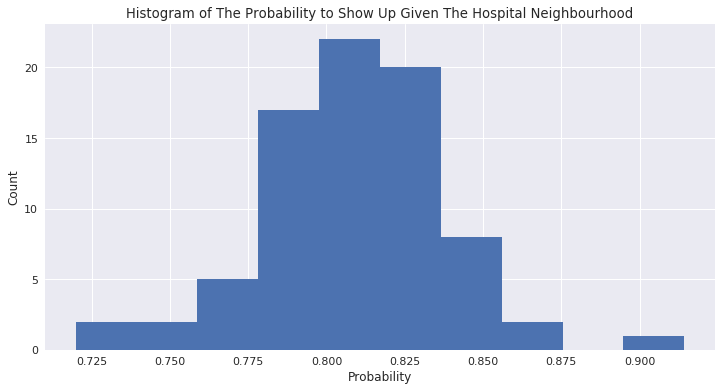

In [75]:
neighbourhoods_probs.probability_show.hist(figsize=(12, 6))
plt.title('Histogram of The Probability to Show Up Given The Hospital Neighbourhood')
plt.xlabel('Probability')
plt.ylabel('Count')
plt.show()

In [76]:
max_value = neighbourhoods_probs.probability_show.max()
min_value = neighbourhoods_probs.probability_show.min()
neighbourhoods_probs[neighbourhoods_probs.probability_show.isin([max_value, min_value])]

,neighbourhood,probability_show
31,ILHA DO BOI,0.914286
70,SANTOS DUMONT,0.719902


The neighbourhoods of maximum and minimum probabilities for patients to show up are ILHA DO BOI and SANTOS DUMONT respectively

In [77]:
n1 = df_clean[df_clean.neighbourhood == 'ILHA DO BOI'].shape[0]
n2 = df_clean[df_clean.neighbourhood == 'SANTOS DUMONT'].shape[0]

print('The number of patients who scheduled appoitments in SANTOS DUMONT, SANTOS DUMONT neighbourhoods are {}, {}'.format(n1, n2))

The number of patients who scheduled appoitments in SANTOS DUMONT, SANTOS DUMONT neighbourhoods are 35, 1221


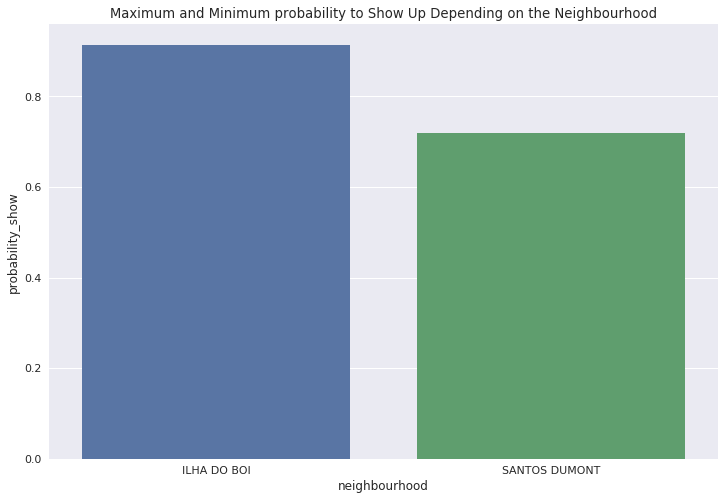

In [78]:
hospitals_probs = neighbourhoods_probs[neighbourhoods_probs.probability_show.isin([max_value, min_value])]
plt.figure(figsize=(12, 8))
sns.barplot(data=hospitals_probs, x='neighbourhood', y='probability_show')
plt.title('Maximum and Minimum probability to Show Up Depending on the Neighbourhood')
plt.show()

### Research Question 9 Does showing up depend on Scholarship, Hipertension, diabetes, alcoholism, SMS received?

In [79]:
features = ['scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received']

In [80]:
# A helper Function 
def get_probs_plot(attr):
    '''
    Takes the attribute as an argument and returns the probability to show given different values of the attribute and plots 
    the probability distribution
    '''
    p = df_clean.groupby(attr).show.mean().to_numpy()
    p = np.round(p, 2)
    if attr == 'handcap':
        print('Probability of showing up given the patient has 0 disabilities: {}'.format(p[0]))
        print('Probability of showing up given the patient has 1 disabilities: {}'.format(p[1]))
        print('Probability of showing up given the patient has 2 disabilities: {}'.format(p[2]))
        print('Probability of showing up given the patient has 3 disabilities: {}'.format(p[3]))
        print('Probability of showing up given the patient has 4 disabilities: {}'.format(p[4]))
    
    else:
        print('Probability to show up given the patient does not have {}: {}'.format(attr ,p[0]))
        print('Probability to show up given the patient has {}: {}'.format(attr ,p[1]))
    plt.figure(figsize=(10, 5))
    plt.title(attr.capitalize() + ' Effect on Showing Up', fontdict={'fontsize': 20})
    sns.barplot(x=df_clean[attr], y=df_clean.show, data=df_clean)
    plt.show()

Probability to show up given the patient does not have scholarship: 0.81
Probability to show up given the patient has scholarship: 0.77


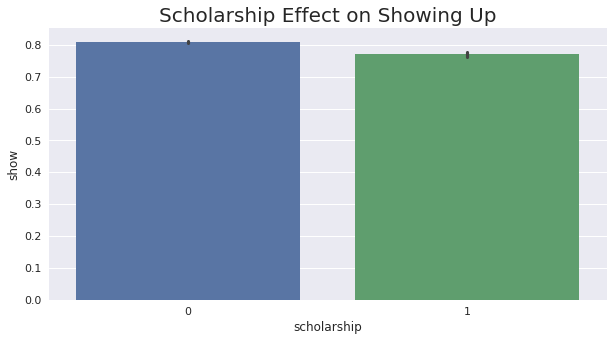

In [81]:
get_probs_plot('scholarship')

Patients who do not have scholarship show up more often

Probability to show up given the patient does not have hipertension: 0.8
Probability to show up given the patient has hipertension: 0.84


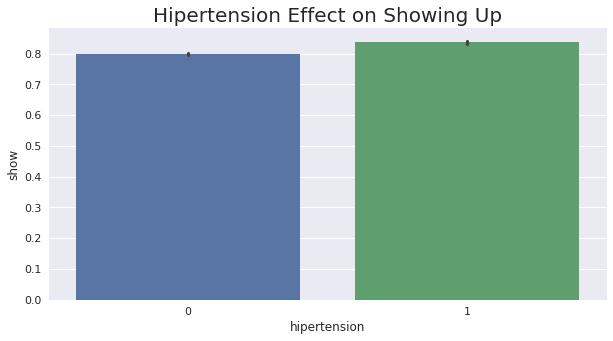

In [82]:
get_probs_plot('hipertension')

Patients who have hipertension show up more often

Probability to show up given the patient does not have diabetes: 0.8
Probability to show up given the patient has diabetes: 0.83


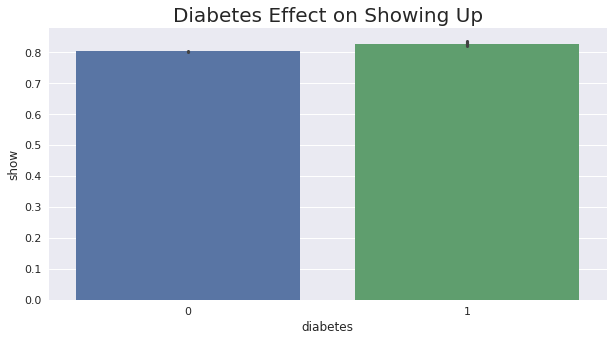

In [83]:
get_probs_plot('diabetes')

Patients who have diabetes show up more often 

Probability to show up given the patient does not have alcoholism: 0.81
Probability to show up given the patient has alcoholism: 0.81


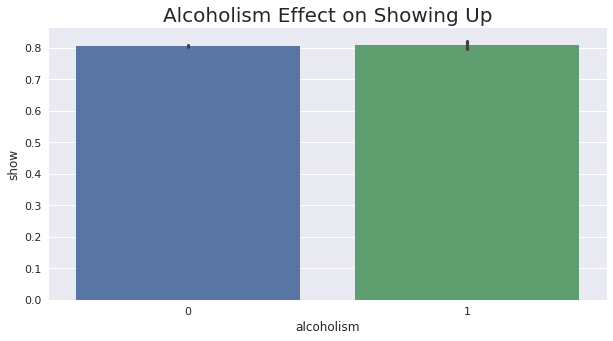

In [84]:
get_probs_plot('alcoholism')

Alcoholism does not affect showin up or not

### Research Question 10 Do handicapped patients show up more often?


Probability of showing up given the patient has 0 disabilities: 0.81
Probability of showing up given the patient has 1 disabilities: 0.83
Probability of showing up given the patient has 2 disabilities: 0.82
Probability of showing up given the patient has 3 disabilities: 0.77
Probability of showing up given the patient has 4 disabilities: 0.67


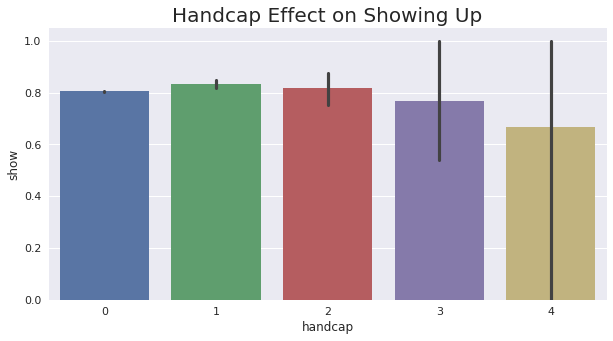

In [85]:
get_probs_plot('handcap')

### Research Question 11 Does receiving an SMS affect showing up?

Patients who have 1 disabilities show up the most often, while patiens with 4 disabilities show up the least

Probability to show up given the patient does not have sms_received: 0.84
Probability to show up given the patient has sms_received: 0.73


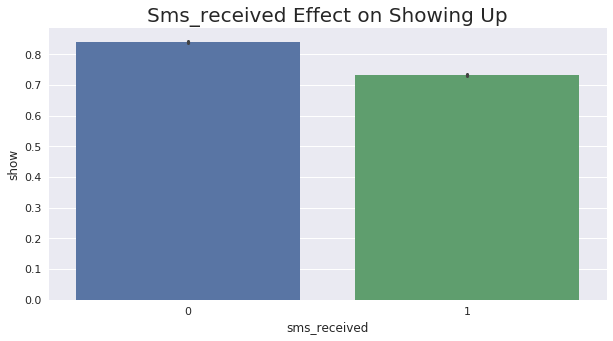

In [86]:
get_probs_plot('sms_received')

Patients who received SMS show up less often than those who didn't


## Conclusions

>
*   Gender does not affect showing up.
*   Some of the features are positively corrolated like: age and hipertension while some are negatively corrolated like: SMS received and 
*   The patients age distribution is skewed to the right
*   Teenagers are most likely not to show up for an appointment while Late Adults are most likely to show yp
*   Male Late Adults are more likely to show up for an appointment than female Late Adults, while female Teenagers show up more often than male teenagers.
*   Thursday is the day on which people show up the most, while Saturday is the day on which people show up the least
*   On Wednesday and Thursday Females show up more often than males, while on the other days males show up more often
*   Alcoholics show up more often on Friday, Wednesday and Saturday
*   Most of the patients who scheduled an appointment on the same day showed up. The patients who scheduled an appointmetn 3 days ahead were the most likely not to show up
*   The neighbourhoods of maximum and minimum probabilities for patients to show up are ILHA DO BOI and SANTOS DUMONT with probabilities 91.4% and 71.9% respectively
*   Patients who do not have scholarship show up more often
*   Patients who have hipertension show up more often
*   Patients who have diabetes show up more often
*   Alcoholism does not affect showin up or not
*   Patients who have 1 disabilities show up the most often, while patiens with 4 disabilities show up the least
*   Patients who received SMS show up less often than those who didn't
*   Additional research can be done by collecting data for other months or other neighbourhoods
*   More males iformation is required or some information about the ration of men and women in the source of the dataset




### Limitations
> 
*   Most of the patients are females, about two thirds of the dataset
*   Many rows in which the same patient registers the sane appointment day.
*   Lots of patients have 0 age
*   Not so many patients register in PARQUE INDUSTRIAL ILHAS OCEANICAS DE TRINDADE, AEROPOTO and other neighbourhoods.
*   Mosts of the features are categorical features.
*   The data covers one month, May, and a few days from April and June


## Submitting your Project 
